In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import warnings
import random
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
X_train_pp=pd.read_csv('X_train_pp2.csv',header=None)

In [4]:
X_val_pp=pd.read_csv('X_val_pp2.csv',header=None)

In [6]:
train=pd.read_csv('/Users/mac/Desktop/multi-agent AI group/train.csv')
val=pd.read_csv('/Users/mac/Desktop/multi-agent AI group/validation.csv')

In [7]:
X_train_pp['slotprice']=train['slotprice']
X_val_pp['slotprice']=val['slotprice']

In [6]:
X_train_pp.to_csv('X_train_pp3.csv')
X_val_pp.to_csv('X_val_pp3.csv')

In [9]:
X=X_train_pp
Y=pd.read_csv("y_train2.csv",header=None)
X_val=X_val_pp
Y_val=pd.read_csv("y_val2.csv",header=None)

In [8]:
# X_train=pd.concat([X_train_0,X_train_1], axis = 0)

In [9]:
# Y_train=X_train['click']

In [10]:
# del X_train['click']

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [11]:
X_train=X
Y_train=Y

In [12]:
# logisticRegr = LogisticRegression()
model = LogisticRegression(class_weight='balanced', C = 0.001)
model.fit(X_train, Y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [13]:
pred=model.predict_proba(X_val)[:, 1]

In [14]:
pred

array([0.23336958, 0.14876101, 0.11550731, ..., 0.41109904, 0.12742876,
       0.30757019])

In [ ]:
# pred_click=model.predict(X_val)

In [ ]:
# pred_click

In [ ]:
# predictions_prob.max()

In [ ]:
# pred=predictions_prob

In [ ]:
# thres=10**(-6)
# pred [pred > thres] = 1
# pred [pred <= thres] = 0

In [ ]:
# pred

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(Y_val,pred_click))
# print(confusion_matrix(Y_val, pred_click))

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve


roc_auc_score(Y_val, pred)

0.8422358155749199

In [18]:
Y['click']=Y

In [19]:
# re calibrated predictions
# q = p / (p + (1-p) / w

pred_ff =[]
# pred_test=[]

a = np.bincount(Y.click)
w = a[1] / a[0]

for p in pred:
    pred_ff.append( p / (p + ((1-p)/w)))

# for p in pCTR_test[1]:
#     pred_test.append( p / (p + ((1-p)/w)))

In [20]:
pred_ff

[0.00022463622195496635,
 0.00012897357793485834,
 9.638124157355406e-05,
 7.648931204515254e-05,
 9.269419156866622e-05,
 0.00041430051555511345,
 0.0003783907539481655,
 0.0006424166092680875,
 0.00012493414618163607,
 0.00011869977901588478,
 0.0004707376965841869,
 0.00015912327993233502,
 0.0002241754792607813,
 0.00023527828256632015,
 0.001069319006437523,
 0.00024965896751237505,
 0.00015721132292996468,
 0.00013095145746988709,
 0.0011184773791853633,
 0.00010234423077984296,
 0.0004858810510002658,
 0.0003873510745099568,
 0.00026838077911286496,
 0.0002516604684060826,
 0.0017523816189223482,
 0.0006151175294076886,
 3.5261673011215375e-05,
 0.00034816483685436514,
 3.2177392985923805e-05,
 0.00023129262673468866,
 0.00021986789186793874,
 0.0004338745881470117,
 0.00020111268471762926,
 0.0006542850782177317,
 0.0002966273840760406,
 7.633145862815222e-05,
 0.0003713465691484463,
 0.0001562441346157307,
 0.0002745276211214836,
 0.0001465660097161752,
 0.0007928149085123062,

In [21]:
del Y['click']

In [23]:
pred=pd.DataFrame(columns=['pre_click'],data=pred_ff)#数据有三列，列名分别为one,two,three
pred.to_csv('pred_lr2.csv')

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [27]:
pred=pd.read_csv('pred_lr2.csv')

# linear bidding on validation set 

In [29]:
pred=pred['pre_click']

In [30]:
avgCTR=0.0007375623256619447
bids = []
base_bids = np.arange(1,302,2)
for base_bid in base_bids:
    for i in range(0, len(pred)):
        bid = base_bid * (pred[i] / avgCTR)
        bids.append(bid)  

In [31]:
bid_for_basebid = [bids[x:x+len(pred)] for x in range(0, len(bids), len(pred))]

In [32]:
# Bidding function
def linearbidding(bids):
    impression = 0
    clicks = 0
    cost = 0  
    budget = 6250*1000   
    
    win_check = bids >= val.payprice
    for i in range(0,len(win_check)):
            if win_check[i]==True:
                impression += 1
                clicks += val.click[i]
                cost += val.payprice[i]
            if cost >= budget:
                break
    return impression, clicks, cost


bid_final = pd.DataFrame()
bid_final['bid'] = base_bids

imp = []
clks = []
costs = []

for bids in bid_for_basebid:
    [impressions, clicks, cost] = linearbidding(bids)
    imp.append(impressions)
    clks.append(clicks)
    costs.append(cost)

bid_final['imps_won'] = imp
bid_final.imps_won = bid_final.imps_won.astype(int)
bid_final['spend'] = costs
bid_final['clicks'] = clks
bid_final['CTR'] = (bid_final.clicks/bid_final.imps_won * 100).round(4).astype(str)
bid_final['CPM'] = (bid_final.spend/bid_final.imps_won * 1000).round(2).astype(str)
bid_final['CPC'] = (bid_final.spend/bid_final.clicks).round(2).astype(str)



Text(0,0.5,'clicks')

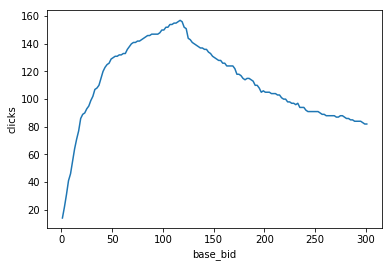

In [33]:
plt.plot(bid_final.bid,bid_final.clicks)
plt.xlabel('base_bid')
plt.ylabel('clicks')

In [45]:
CTR=bid_final.CTR

In [53]:
CTR

0      1.3146
1      0.6465
2      0.5435
3         0.5
4      0.4269
5      0.4111
6      0.4015
7      0.3855
8       0.366
9      0.3636
10     0.3403
11     0.3136
12     0.2976
13     0.2807
14      0.272
15      0.262
16     0.2585
17      0.246
18      0.237
19     0.2356
20     0.2341
21     0.2292
22     0.2229
23     0.2157
24     0.2124
25     0.2059
26     0.2002
27     0.1935
28     0.1888
29      0.183
        ...  
121    0.0862
122    0.0863
123    0.0865
124    0.0867
125    0.0868
126     0.087
127    0.0862
128    0.0854
129    0.0855
130    0.0847
131    0.0848
132     0.085
133    0.0851
134    0.0853
135    0.0844
136    0.0845
137    0.0856
138    0.0858
139    0.0849
140    0.0841
141    0.0842
142    0.0834
143    0.0835
144    0.0826
145    0.0828
146    0.0829
147     0.083
148    0.0821
149    0.0812
150    0.0813
Name: CTR, Length: 151, dtype: object

In [47]:
bids=bid_final.bid

Text(0,0.5,'clicks')

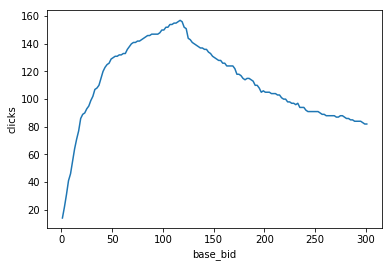

In [56]:
fig, ax = plt.subplots()
ax.plot(bid_final.bid,bid_final.clicks)
ax.set_xlabel('base_bid')
ax.set_ylabel('clicks')



In [81]:
opt_basebid = bid_final.bid[np.argmax(bid_final.clicks)]

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [82]:
opt_basebid

117

In [34]:
max(bid_final.clicks)

157

In [74]:
# X_train_pp.to_csv('X_train_pp3.csv')
# X_val_pp.to_csv('X_val_pp3.csv')

In [68]:
X_test=pd.read_csv('/Users/mac/Desktop/multi-agent AI group/code from Matt/X_test_pp.csv')

In [72]:
X_test.drop(X_test.columns[[0]], axis=1, inplace=True)

In [73]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,694,695,696,697,698,699,700,701,702,slotprice
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5


In [75]:
pred_test=model.predict_proba(X_test)[:, 1]

In [77]:
pred_test_f=[]
for p in pred_test:
    pred_test_f.append( p / (p + ((1-p)/w)))

In [80]:
pred_test_f=pd.DataFrame(columns=['pre_click'],data=pred_test_f)
pred_test_f.to_csv('pTCR_test.csv')

In [85]:
pred_test_f=pred_test_f['pre_click']

In [89]:
bids_test = []
base_bids = opt_basebid
for i in range(0, len(pred_test_f)):
    bid = base_bids * (pred_test_f[i] / avgCTR)
    bids_test.append(bid)  

In [91]:
df_test=pd.read_csv('/Users/mac/Desktop/multi-agent AI group/test.csv')

In [102]:
new=df_test[['bidid']]

In [103]:
new['bidprice']=bids_test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
new.to_csv('testing_bidding_price_linear.csv')